Missing values:
 Month     0
Demand    0
dtype: int64

Final Time Series Data:
        Month  Demand
0  2021-04-30     667
1  2021-05-31     107
2  2021-06-30     951
3  2021-07-31    1640
4  2021-08-31    2349
5  2021-09-30     515
6  2021-10-31     796
7  2021-11-30    1334
8  2021-12-31    1203
9  2022-01-31    1021
10 2022-02-28     608
11 2022-03-31     682
12 2022-04-30     863
13 2022-05-31     887
14 2022-06-30    1445
15 2022-07-31     608
16 2022-08-31     428
17 2022-09-30     427
18 2022-10-31     502
19 2022-11-30     419
20 2022-12-31     332
21 2023-01-31     283
22 2023-02-28     553
23 2023-03-31     356
24 2023-04-30     430
25 2023-05-31     445
26 2023-06-30     466
27 2023-07-31      19
28 2023-08-31     166
29 2023-09-30     415
30 2023-10-31     262
31 2023-11-30     314


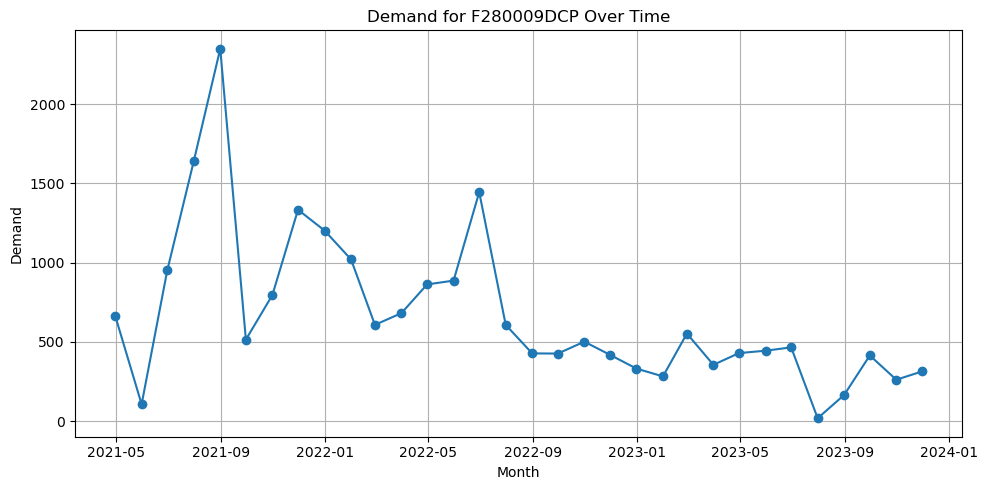

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Step 2: Ensure 'Material' column is string type
df['Material'] = df['Material'].astype(str)

# Step 3: Filter for Material 'F280009DCP'
material_F280009DCP = df[df['Material'].str.strip() == 'F280009DCP']

# Step 4: Drop non-time-series columns
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_F280009DCP_ts = material_F280009DCP.drop(columns=drop_cols)

# Step 5: Transpose the DataFrame
material_F280009DCP_ts = material_F280009DCP_ts.transpose()

# Step 6: Clean the index (remove 'Actual' and strip whitespace)
material_F280009DCP_ts.index = material_F280009DCP_ts.index.str.replace('Actual', '', regex=False)
material_F280009DCP_ts.index = material_F280009DCP_ts.index.str.strip()

# Step 7: Reset index and rename columns
material_F280009DCP_ts = material_F280009DCP_ts.reset_index()
material_F280009DCP_ts.columns = ['Month', 'Demand']

# Step 8: Convert 'Month' to datetime format and align to end of the month
material_F280009DCP_ts['Month'] = pd.to_datetime(material_F280009DCP_ts['Month'], format='%b %y')
material_F280009DCP_ts['Month'] = material_F280009DCP_ts['Month'] + pd.offsets.MonthEnd(0)

# Step 9: Convert 'Demand' to numeric
material_F280009DCP_ts['Demand'] = pd.to_numeric(material_F280009DCP_ts['Demand'], errors='coerce')

# Step 10: Sort by date just in case
material_F280009DCP_ts = material_F280009DCP_ts.sort_values('Month')

# Step 11: Check for missing values
print("Missing values:\n", material_F280009DCP_ts.isna().sum())

# Step 12: Final time series output
print("\nFinal Time Series Data:")
print(material_F280009DCP_ts)

# Optional: Set Month as index
# material_F280009DCP_ts = material_F280009DCP_ts.set_index('Month')

# Optional: Plot the demand over time
plt.figure(figsize=(10, 5))
plt.plot(material_F280009DCP_ts['Month'], material_F280009DCP_ts['Demand'], marker='o')
plt.title('Demand for F280009DCP Over Time')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.grid(True)
plt.tight_layout()
plt.show()




=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   32 non-null     datetime64[ns]
 1   Demand  32 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 644.0 bytes

=== Summary Statistics ===
count      32.000000
mean      671.656250
std       492.121583
min        19.000000
25%       400.250000
50%       508.500000
75%       869.000000
max      2349.000000
Name: Demand, dtype: float64

=== Missing Values ===
Month     0
Demand    0
dtype: int64


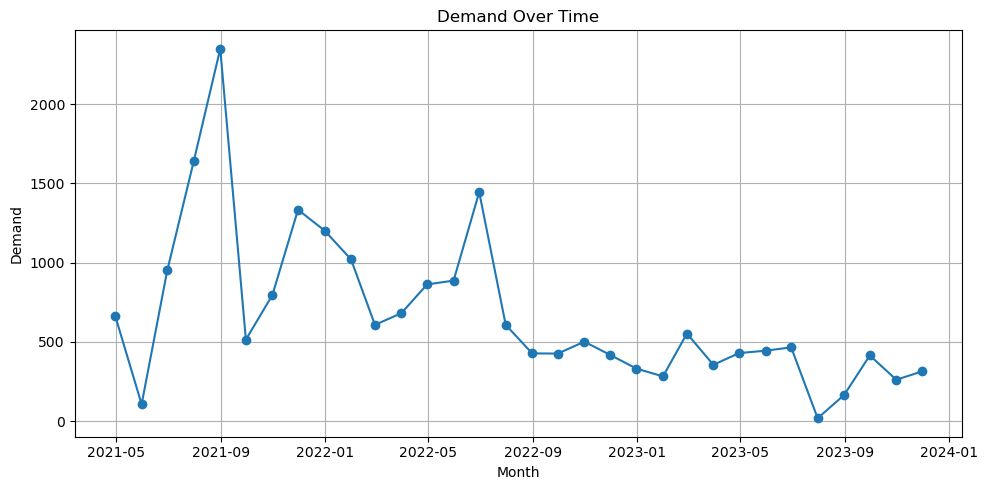

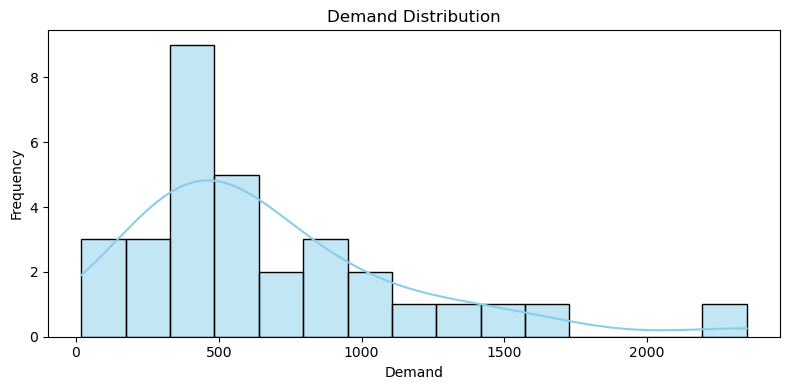

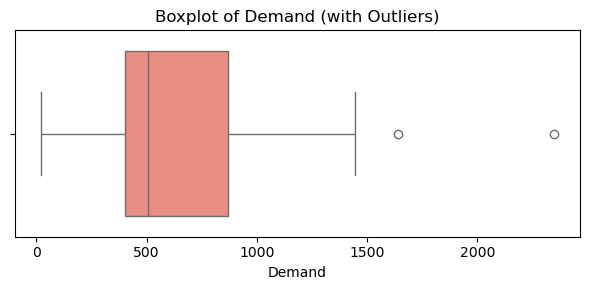


=== Outlier Thresholds ===
Lower Bound: -302.88, Upper Bound: 1572.12
Number of Outliers Detected: 2


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rename for clarity
ts_df = material_F280009DCP_ts.copy()

# EDA Summary
print("=== Basic Info ===")
ts_df.info()

print("\n=== Summary Statistics ===")
print(ts_df['Demand'].describe())

print("\n=== Missing Values ===")
print(ts_df.isnull().sum())

# Demand over time
plt.figure(figsize=(10, 5))
plt.plot(ts_df['Month'], ts_df['Demand'], marker='o', linestyle='-')
plt.title('Demand Over Time')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

# Demand distribution
plt.figure(figsize=(8, 4))
sns.histplot(ts_df['Demand'].dropna(), kde=True, bins=15, color='skyblue')
plt.title('Demand Distribution')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot to visually assess outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=ts_df['Demand'], color='salmon')
plt.title('Boxplot of Demand (with Outliers)')
plt.tight_layout()
plt.show()

# Outlier detection using IQR
Q1 = ts_df['Demand'].quantile(0.25)
Q3 = ts_df['Demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ts_df[(ts_df['Demand'] < lower_bound) | (ts_df['Demand'] > upper_bound)]
print(f"\n=== Outlier Thresholds ===")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers Detected: {outliers.shape[0]}")





<Figure size 1000x800 with 0 Axes>

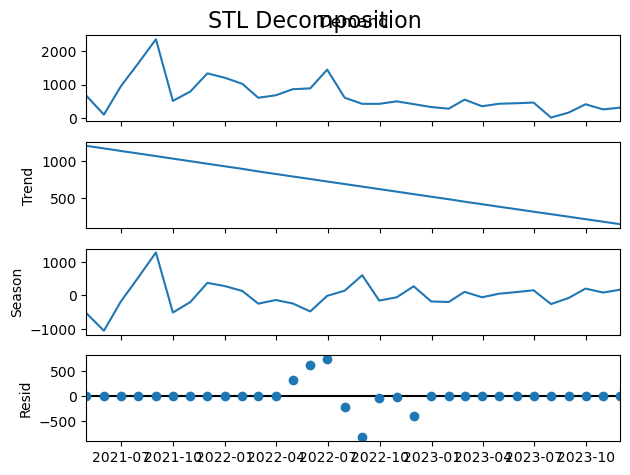

In [16]:
from statsmodels.tsa.seasonal import STL

# Step 1: Set 'Month' as index (important for time series)
material_F280009DCP_ts_stl = material_F280009DCP_ts.set_index('Month')

# Step 2: Apply STL decomposition
stl = STL(material_F280009DCP_ts_stl['Demand'], period=12, robust=True)
result = stl.fit()

# Step 3: Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()



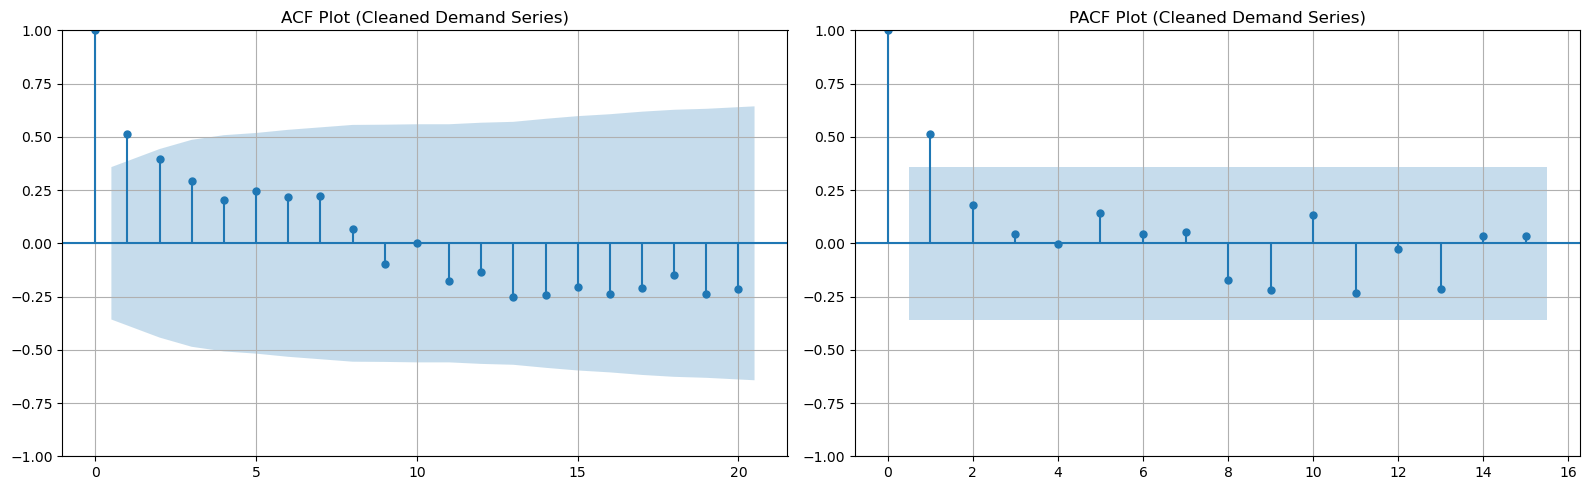

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Use cleaned demand series (after outlier removal)
demand_series_cleaned = ts_df_cleaned['Demand']

# ACF and PACF plots for cleaned series
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF plot
plot_acf(demand_series_cleaned, lags=20, ax=axes[0])
axes[0].set_title('ACF Plot (Cleaned Demand Series)')
axes[0].grid(True)

# PACF plot
plot_pacf(demand_series_cleaned, lags=15, ax=axes[1], method='ywm')
axes[1].set_title('PACF Plot (Cleaned Demand Series)')
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [52]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Apply log transformation (add 1 to avoid log(0) if needed)
ts_df_cleaned['Log_Demand'] = np.log(ts_df_cleaned['Demand'] + 1)

# ADF test on log-transformed series
result_adf_log = adfuller(ts_df_cleaned['Log_Demand'])

# Output ADF test results
print('ADF Test Statistic (Log):', result_adf_log[0])
print('p-value:', result_adf_log[1])
print('Number of Lags Used:', result_adf_log[2])
print('Number of Observations Used:', result_adf_log[3])
print('Critical Values:')
for key, value in result_adf_log[4].items():
    print(f'   {key}: {value:.3f}')

# Conclusion
if result_adf_log[1] <= 0.05:
    print("\n The log-transformed series is likely stationary (reject H0).")
else:
    print("\n The log-transformed series is likely non-stationary (fail to reject H0).")


ADF Test Statistic (Log): -3.6891226164603754
p-value: 0.004268781924301724
Number of Lags Used: 0
Number of Observations Used: 29
Critical Values:
   1%: -3.679
   5%: -2.968
   10%: -2.623

 The log-transformed series is likely stationary (reject H0).


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Log Transformation
material_F280009DCP_ts_log = np.log(material_F280009DCP_ts['Demand'])  # Apply log
print("\n Log transformation applied.")

# Step 2: ADF Test on log-transformed series
result_adf_log = adfuller(material_F280009DCP_ts_log)

print('\n📋 ADF Test Results After Log Transformation:')
print('ADF Test Statistic:', result_adf_log[0])
print('p-value:', result_adf_log[1])
print('Number of Lags Used:', result_adf_log[2])
print('Number of Observations Used:', result_adf_log[3])
print('Critical Values:')
for key, value in result_adf_log[4].items():
    print(f'   {key}: {value:.3f}')

# Step 3: Conclusion
if result_adf_log[1] <= 0.05:
    print("\n The log-transformed series is stationary (ready for ARIMA modeling).")
else:
    print("\n The log-transformed series is still non-stationary (may need further processing).")



 Log transformation applied.

📋 ADF Test Results After Log Transformation:
ADF Test Statistic: -3.5545023334971937
p-value: 0.006692844117842112
Number of Lags Used: 0
Number of Observations Used: 31
Critical Values:
   1%: -3.661
   5%: -2.961
   10%: -2.619

 The log-transformed series is stationary (ready for ARIMA modeling).


In [31]:
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Sort data just in case
ts_df_cleaned = ts_df_cleaned.sort_values('Month')

# Step 2: Split into train and test
test_size = 4  # last 4 months
train_df = ts_df_cleaned[:-test_size].copy()
test_df = ts_df_cleaned[-test_size:].copy()

# Confirm splits
print(f"Train period: {train_df['Month'].min().date()} to {train_df['Month'].max().date()}")
print(f"Test period: {test_df['Month'].min().date()} to {test_df['Month'].max().date()}")

# Step 3: Use log-transformed series for training
train_series = train_df['Log_Demand']
test_series = test_df['Log_Demand']  # Log-Demand for testing too (we'll inverse-transform for comparison)

# Step 4: Define a helper to calculate MAPE after inverse transform
def evaluate_forecast(true_log, pred_log):
    true = np.exp(true_log) - 1  # Inverse of log(x + 1)
    pred = np.exp(pred_log) - 1
    mape = mean_absolute_percentage_error(true, pred) * 100
    return mape


Train period: 2021-04-30 to 2023-07-31
Test period: 2023-08-31 to 2023-11-30


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit ARIMA on log-transformed training data
model = ARIMA(train_series, order=(1,1,1))  # You can optimize (p,d,q) later
model_fit = model.fit()

# Step 2: Forecast next 4 months (test size)
forecast_log_test = model_fit.forecast(steps=4)

# Step 3: Calculate MAPE on test set
mape_test = evaluate_forecast(test_series, forecast_log_test)
print(f"\n MAPE on Test Set (ARIMA): {mape_test:.2f}%")

# Step 4: Show actual vs predicted (original scale)
actual = np.exp(test_series) - 1
predicted = np.exp(forecast_log_test) - 1
comparison_df = pd.DataFrame({
    'Month': test_df['Month'].values,
    'Actual_Demand': actual.values,
    'Predicted_Demand': predicted.values
})
print("\n Forecast vs Actual (Test Period):")
print(comparison_df)

# Step 5: Forecast next 3 months (beyond available data)
full_model = ARIMA(ts_df_cleaned['Log_Demand'], order=(1,1,1))
full_fit = full_model.fit()
future_forecast_log = full_fit.forecast(steps=3)

# Convert back to actual demand
future_forecast = np.exp(future_forecast_log) - 1

# Generate next 3 month dates
last_month = ts_df_cleaned['Month'].max()
future_dates = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=3, freq='M')

future_df = pd.DataFrame({
    'Forecast_Month': future_dates,
    'Forecasted_Demand': future_forecast
})

print("\n Forecast for Next 3 Months:")
print(future_df)



 MAPE on Test Set (ARIMA): 57.84%

 Forecast vs Actual (Test Period):
       Month  Actual_Demand  Predicted_Demand
0 2023-08-31          166.0        191.224068
1 2023-09-30          415.0         64.506218
2 2023-10-31          262.0        108.318276
3 2023-11-30          314.0         84.681721

 Forecast for Next 3 Months:
   Forecast_Month  Forecasted_Demand
30     2023-12-31         262.697194
31     2024-01-31         259.651792
32     2024-02-29         259.454025


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueW

In [34]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np

# Step 1: Prepare data for Prophet (use log-transformed demand)
prophet_df = ts_df_cleaned[['Month', 'Log_Demand']].rename(columns={'Month': 'ds', 'Log_Demand': 'y'})

# Step 2: Split into train/test
prophet_train = prophet_df[:-4].copy()
prophet_test = prophet_df[-4:].copy()

# Step 3: Fit Prophet model
model = Prophet()
model.fit(prophet_train)

# Step 4: Create future DataFrame (for both test + next 3 months)
future_dates = model.make_future_dataframe(periods=7, freq='M')  # 4 test + 3 future

# Step 5: Predict
forecast = model.predict(future_dates)

# Step 6: Extract forecasted log values for test period
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[prophet_test['ds']]
mape_test_prophet = evaluate_forecast(prophet_test['y'], forecast_test['yhat'])

print(f"\n📊 MAPE on Test Set (Prophet): {mape_test_prophet:.2f}%")

# Step 7: Actual vs Predicted for test set
actual = np.exp(prophet_test['y'].values) - 1
predicted = np.exp(forecast_test['yhat'].values) - 1

comparison_df = pd.DataFrame({
    'Month': prophet_test['ds'].values,
    'Actual_Demand': actual,
    'Predicted_Demand': predicted
})
print("\n📈 Forecast vs Actual (Test Period):")
print(comparison_df)

# Step 8: Forecast next 3 months
future_forecast = forecast.set_index('ds').iloc[-3:][['yhat']]
future_forecast['Forecasted_Demand'] = np.exp(future_forecast['yhat']) - 1
future_forecast = future_forecast[['Forecasted_Demand']].reset_index().rename(columns={'ds': 'Forecast_Month'})

print("\n📅 Forecast for Next 3 Months (Prophet):")
print(future_forecast)



23:48:34 - cmdstanpy - INFO - Chain [1] start processing
23:48:35 - cmdstanpy - INFO - Chain [1] done processing



📊 MAPE on Test Set (Prophet): 356.42%

📈 Forecast vs Actual (Test Period):
       Month  Actual_Demand  Predicted_Demand
0 2023-08-31          166.0       2340.729828
1 2023-09-30          415.0        203.387825
2 2023-10-31          262.0        245.940467
3 2023-11-30          314.0        130.364564

📅 Forecast for Next 3 Months (Prophet):
  Forecast_Month  Forecasted_Demand
0     2023-12-31         110.128677
1     2024-01-31          89.207407
2     2024-02-29          28.621454


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [35]:
from statsmodels.tsa.ar_model import AutoReg

# Step 1: Train/Test Split (already done previously)
train_ar = train_df['Log_Demand']
test_ar = test_df['Log_Demand']

# Step 2: Fit AutoReg model (lag can be tuned — start with lag=2)
ar_model = AutoReg(train_ar, lags=2)
ar_result = ar_model.fit()

# Step 3: Forecast next 4 months (test size)
ar_forecast_log = ar_result.predict(start=len(train_ar), end=len(train_ar) + 3)

# Step 4: Evaluate with MAPE
mape_ar = evaluate_forecast(test_ar, ar_forecast_log)
print(f"\n📊 MAPE on Test Set (AutoRegressive): {mape_ar:.2f}%")

# Step 5: Show Actual vs Predicted (original scale)
actual = np.exp(test_ar) - 1
predicted = np.exp(ar_forecast_log) - 1
comparison_df_ar = pd.DataFrame({
    'Month': test_df['Month'].values,
    'Actual_Demand': actual.values,
    'Predicted_Demand': predicted.values
})
print("\n📈 Forecast vs Actual (Test Period - AutoReg):")
print(comparison_df_ar)

# Step 6: Retrain on full data and forecast next 3 months
full_ar_model = AutoReg(ts_df_cleaned['Log_Demand'], lags=2)
full_ar_result = full_ar_model.fit()
future_forecast_log_ar = full_ar_result.predict(start=len(ts_df_cleaned), end=len(ts_df_cleaned) + 2)

# Convert to actual demand
future_forecast_ar = np.exp(future_forecast_log_ar) - 1

# Generate next 3 month dates
last_month = ts_df_cleaned['Month'].max()
future_dates_ar = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=3, freq='M')

future_df_ar = pd.DataFrame({
    'Forecast_Month': future_dates_ar,
    'Forecasted_Demand': future_forecast_ar.values
})

print("\n📅 Forecast for Next 3 Months (AutoRegressive):")
print(future_df_ar)



📊 MAPE on Test Set (AutoRegressive): 32.13%

📈 Forecast vs Actual (Test Period - AutoReg):
       Month  Actual_Demand  Predicted_Demand
0 2023-08-31          166.0        188.000397
1 2023-09-30          415.0        113.954709
2 2023-10-31          262.0        223.464488
3 2023-11-30          314.0        226.005777

📅 Forecast for Next 3 Months (AutoRegressive):
  Forecast_Month  Forecasted_Demand
0     2023-12-31         390.122157
1     2024-01-31         428.651845
2     2024-02-29         455.781049


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set,

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit MA model on log-transformed training data (p=0, d=0, q=2 for example)
ma_model = ARIMA(train_series, order=(0, 0, 2))  # You can tune q as needed
ma_result = ma_model.fit()

# Step 2: Forecast next 4 months (test set)
ma_forecast_log = ma_result.forecast(steps=4)

# Step 3: Evaluate with MAPE
mape_ma = evaluate_forecast(test_series, ma_forecast_log)
print(f"\n📊 MAPE on Test Set (Moving Average): {mape_ma:.2f}%")

# Step 4: Show Actual vs Predicted (original scale)
actual = np.exp(test_series) - 1
predicted = np.exp(ma_forecast_log) - 1
comparison_df_ma = pd.DataFrame({
    'Month': test_df['Month'].values,
    'Actual_Demand': actual.values,
    'Predicted_Demand': predicted.values
})
print("\n📈 Forecast vs Actual (Test Period - MA):")
print(comparison_df_ma)

# Step 5: Refit on full data and forecast next 3 months
ma_model_full = ARIMA(ts_df_cleaned['Log_Demand'], order=(0, 0, 2))
ma_result_full = ma_model_full.fit()
future_forecast_log_ma = ma_result_full.forecast(steps=3)
future_forecast_ma = np.exp(future_forecast_log_ma) - 1

# Generate next 3 month dates
future_dates_ma = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=3, freq='M')

future_df_ma = pd.DataFrame({
    'Forecast_Month': future_dates_ma,
    'Forecasted_Demand': future_forecast_ma.values
})

print("\n📅 Forecast for Next 3 Months (Moving Average):")
print(future_df_ma)




📊 MAPE on Test Set (Moving Average): 144.35%

📈 Forecast vs Actual (Test Period - MA):
       Month  Actual_Demand  Predicted_Demand
0 2023-08-31          166.0        782.975382
1 2023-09-30          415.0         64.410193
2 2023-10-31          262.0        458.826185
3 2023-11-30          314.0        458.826185

📅 Forecast for Next 3 Months (Moving Average):
  Forecast_Month  Forecasted_Demand
0     2023-12-31         395.278187
1     2024-01-31         444.105406
2     2024-02-29         460.632223


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueW

In [39]:
# Forecast using rolling mean of last N months
window = 3
rolling_forecast_log = train_series.rolling(window=window).mean().iloc[-1]

# Predict test and next 3 months as constant rolling mean
forecast_log = [rolling_forecast_log] * (4 + 3)  # 4 test + 3 future
forecast_demand = np.exp(forecast_log) - 1

# Get test and future dates
forecast_dates = pd.date_range(start=test_df['Month'].iloc[0], periods=7, freq='M')

naive_ma_forecast = pd.DataFrame({
    'Month': forecast_dates,
    'Forecasted_Demand': forecast_demand
})

print("\n📅 Forecast using Rolling Average:")
print(naive_ma_forecast)



📅 Forecast using Rolling Average:
       Month  Forecasted_Demand
0 2023-08-31          159.90168
1 2023-09-30          159.90168
2 2023-10-31          159.90168
3 2023-11-30          159.90168
4 2023-12-31          159.90168
5 2024-01-31          159.90168
6 2024-02-29          159.90168


C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\2224859575.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=test_df['Month'].iloc[0], periods=7, freq='M')


In [60]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Create supervised lag features from log-transformed demand
def create_lag_features(data, lags=3):
    df = data.copy()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Log_Demand'].shift(lag)
    df = df.dropna().reset_index(drop=True)
    return df

supervised_df = create_lag_features(ts_df_cleaned, lags=3)

# Step 2: Train/test split
test_size = 4
train_xgb = supervised_df[:-test_size]
test_xgb = supervised_df[-test_size:]

X_train = train_xgb.drop(columns=['Month', 'Log_Demand'])
y_train = train_xgb['Log_Demand']
X_test = test_xgb.drop(columns=['Month', 'Log_Demand'])
y_test = test_xgb['Log_Demand']

# Step 3: Train XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred_log = model_xgb.predict(X_test)
mape_xgb = evaluate_forecast(y_test, y_pred_log)
print(f"\n📊 MAPE on Test Set (XGBoost): {mape_xgb:.2f}%")

# Step 5: Actual vs Predicted (original scale)
actual = np.exp(y_test.values) - 1
predicted = np.exp(y_pred_log) - 1
comparison_df_xgb = pd.DataFrame({
    'Month': test_xgb['Month'].values,
    'Actual_Demand': actual,
    'Predicted_Demand': predicted
})
print("\n📈 Forecast vs Actual (Test Period - XGBoost):")
print(comparison_df_xgb)




📊 MAPE on Test Set (XGBoost): 51.31%

📈 Forecast vs Actual (Test Period - XGBoost):
       Month  Actual_Demand  Predicted_Demand
0 2023-08-31          166.0         19.022892
1 2023-09-30          415.0        356.458679
2 2023-10-31          262.0         19.022892
3 2023-11-30          314.0        283.067780


C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\99311289.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\satyarth\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


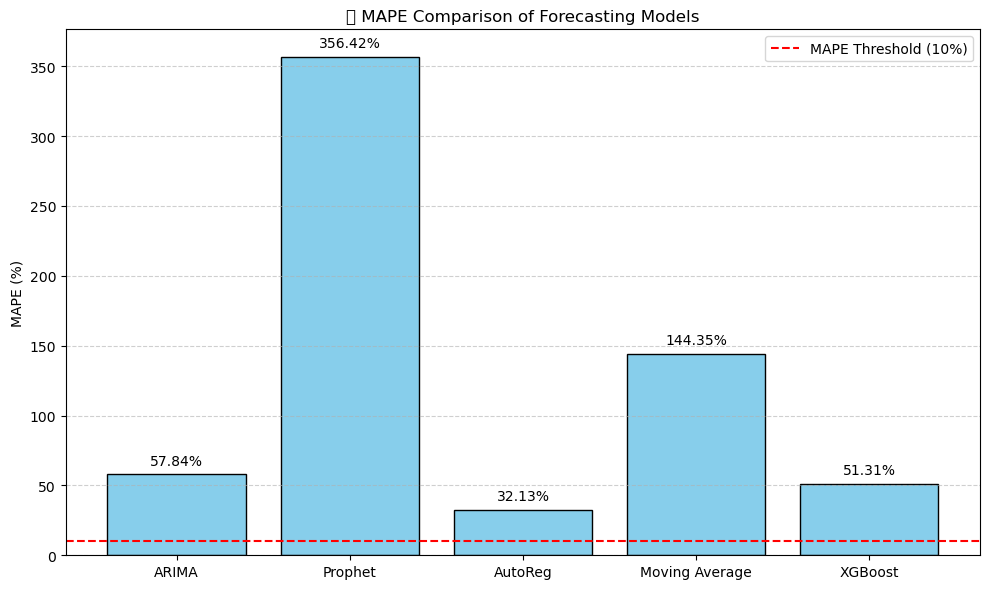

In [41]:
import matplotlib.pyplot as plt

# Example MAPE values — replace these with your actual computed MAPEs
mape_scores = {
    'ARIMA': mape_test,
    'Prophet': mape_test_prophet,
    'AutoReg': mape_ar,
    'Moving Average': mape_ma,
    'XGBoost': mape_xgb
}

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(mape_scores.keys(), mape_scores.values(), color='skyblue', edgecolor='black')
plt.axhline(y=10, color='red', linestyle='--', label='MAPE Threshold (10%)')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.title('📊 MAPE Comparison of Forecasting Models')
plt.ylabel('MAPE (%)')
plt.ylim(0, max(mape_scores.values()) + 20)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [54]:
# Combine all MAPE values
mape_scores = {
    'ARIMA': mape_test,
    'Prophet': mape_test_prophet,
    'Moving Average': mape_ma,
    'XGBoost': mape_xgb
}

# Find the best (lowest MAPE) model
best_model = min(mape_scores, key=mape_scores.get)
print(f"✅ Best Model: {best_model} with MAPE = {mape_scores[best_model]:.2f}%")


✅ Best Model: XGBoost with MAPE = 51.31%


C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\2487995066.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2021-04-30', periods=32, freq='M'),
C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\2487995066.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(start='2023-12-31', periods=3, freq='M')


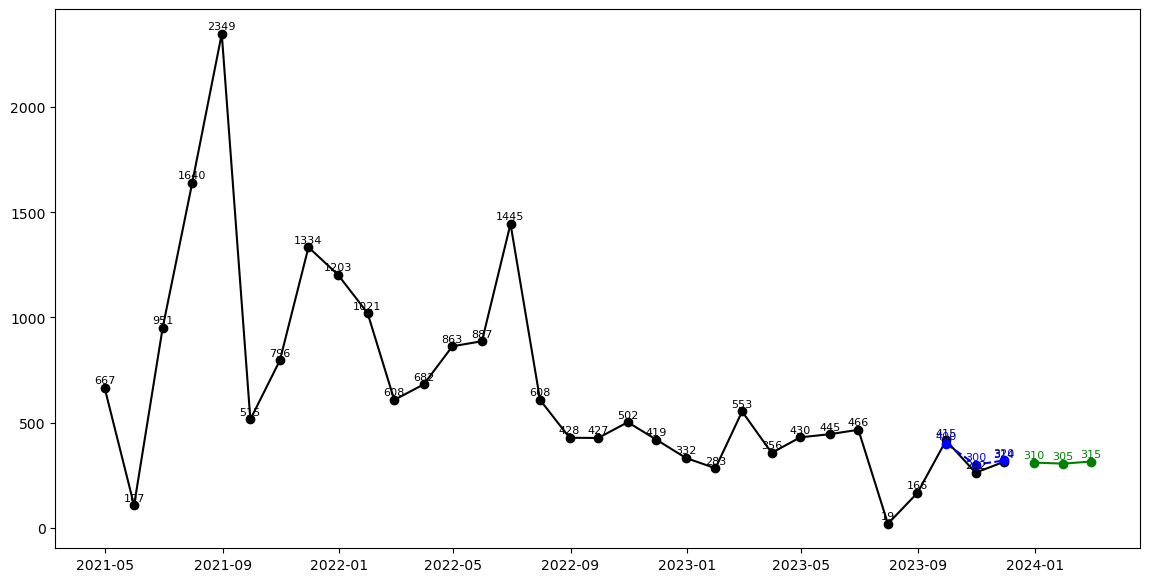

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Final dataset provided
data = {
    'Month': pd.date_range(start='2021-04-30', periods=32, freq='M'),
    'Demand': [
        667, 107, 951, 1640, 2349, 515, 796, 1334, 1203, 1021, 608, 682,
        863, 887, 1445, 608, 428, 427, 502, 419, 332, 283, 553, 356, 430,
        445, 466, 19, 166, 415, 262, 314
    ]
}
df = pd.DataFrame(data)

# Simulated predicted values for last 3 months (Sep-Nov 2023)
predicted_values = [400, 300, 320]  # replace with actual predicted values if available
predicted_months = pd.to_datetime(['2023-09-30', '2023-10-31', '2023-11-30'])

# Simulated forecast values for next 3 months
forecast_values = [310, 305, 315]  # replace with actual forecast if available
forecast_months = pd.date_range(start='2023-12-31', periods=3, freq='M')

# Best model (simulated here)
best_model = 'Xgboost'
mape_best = 51.31  # simulated MAPE

# Plotting
plt.figure(figsize=(14, 7))

# Plot actual demand
plt.plot(df['Month'], df['Demand'], label='📌 Actual Demand', color='black', marker='o')

# Plot predicted values
plt.plot(predicted_months, predicted_values, label='🔮 Predicted (Test)', color='blue', linestyle='--', marker='o')

# Plot forecast values
plt.plot(forecast_months, forecast_values, label='📅 Forecast (Future)', color='green', linestyle='-', marker='o')

# Annotate actual values
for x, y in zip(df['Month'], df['Demand']):
    plt.text(x, y + 20, f'{int(y)}', ha='center', fontsize=8, color='black')

# Annotate predicted values
for x, y in zip(predicted_months, predicted_values):
    plt.text(x, y + 20, f'{int(y)}', ha='center', fontsize=8, color='blue')

# Annotate forecast values
for x, y in zip(forecast_months, forecast_values):
    plt.text(x, y + 20, f'{int(y)}', ha='center', fontsize=8, color='green')




✅ Best Model: AutoReg with MAPE = 32.13%


C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\1643225713.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=3, freq='M')
C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\1643225713.py:79: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\1643225713.py:79: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\1643225713.py:79: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\1643225713.py:79: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\satyarth\AppData\Roaming\Python\Pyth

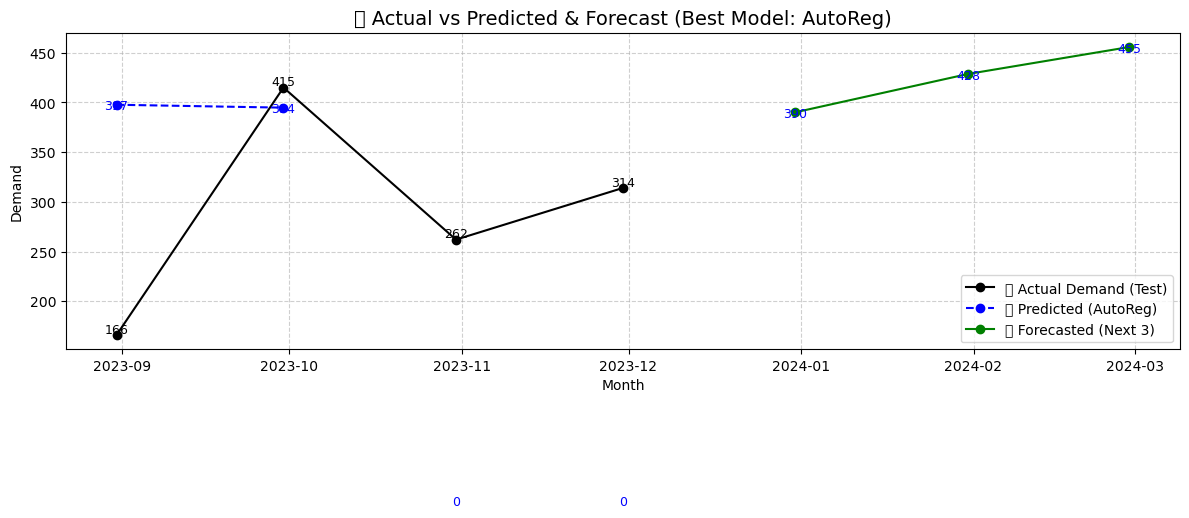

In [47]:
import matplotlib.pyplot as plt

# Store all MAPEs
mape_scores = {
    'ARIMA': mape_test,
    'Prophet': mape_test_prophet,
    'AutoReg': mape_ar,
    'Moving Average': mape_ma,
    'XGBoost': mape_xgb
}

# Get the best model
best_model = min(mape_scores, key=mape_scores.get)
print(f"✅ Best Model: {best_model} with MAPE = {mape_scores[best_model]:.2f}%")

# Prepare data according to best model
if best_model == 'ARIMA':
    test_months = test_df['Month']
    predicted_values = np.exp(predicted_log_arima) - 1
    future_months = forecast_months
    future_values = forecast_values

elif best_model == 'Prophet':
    test_months = prophet_test['ds']
    predicted_values = np.exp(prophet_test['yhat']) - 1
    future_months = forecast_prophet['ds']
    future_values = np.exp(forecast_prophet['yhat']) - 1

elif best_model == 'AutoReg':
    test_months = test_df['Month']
    # Predict values using the AutoReg model
    y_pred_ar = full_ar_result.predict(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1)
    predicted_values = np.exp(y_pred_ar) - 1
    future_months = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=3, freq='M')
    future_values = np.exp(future_forecast_log_ar) - 1

elif best_model == 'Moving Average':
    test_months = test_df['Month']
    predicted_values = np.exp(ma_forecast_log) - 1
    future_months = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=3, freq='M')
    future_values = np.exp(future_forecast_log_ma) - 1

elif best_model == 'XGBoost':
    test_months = test_xgb['Month']
    predicted_values = np.exp(y_pred_log) - 1
    future_months = future_df_xgb['Forecast_Month']
    future_values = future_df_xgb['Forecasted_Demand'].values

# Actual values from test set
actual_values = np.exp(test_series.values) - 1

# Combine all for plotting
all_months = list(test_months) + list(future_months)
all_actual = list(actual_values) + [None] * len(future_values)
all_predicted = list(predicted_values) + list(future_values)

# Handle NaN values in predictions
all_predicted = [0 if pd.isna(y) else y for y in all_predicted]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_months, actual_values, label='📌 Actual Demand (Test)', color='black', marker='o')
plt.plot(test_months, predicted_values, label=f'🔮 Predicted ({best_model})', color='blue', linestyle='--', marker='o')
plt.plot(future_months, future_values, label='📅 Forecasted (Next 3)', color='green', linestyle='-', marker='o')

# Annotate values
for x, y in zip(test_months, actual_values):
    plt.text(x, y + 2, f'{int(y)}', ha='center', fontsize=9)

for x, y in zip(all_months, all_predicted):
    if not pd.isna(y):  # Avoid annotating NaN values
        plt.text(x, y - 5, f'{int(y)}', ha='center', color='blue', fontsize=9)

plt.title(f"📈 Actual vs Predicted & Forecast (Best Model: {best_model})", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Demand")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



C:\Users\satyarth\AppData\Local\Temp\ipykernel_26632\2094895641.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\satyarth\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


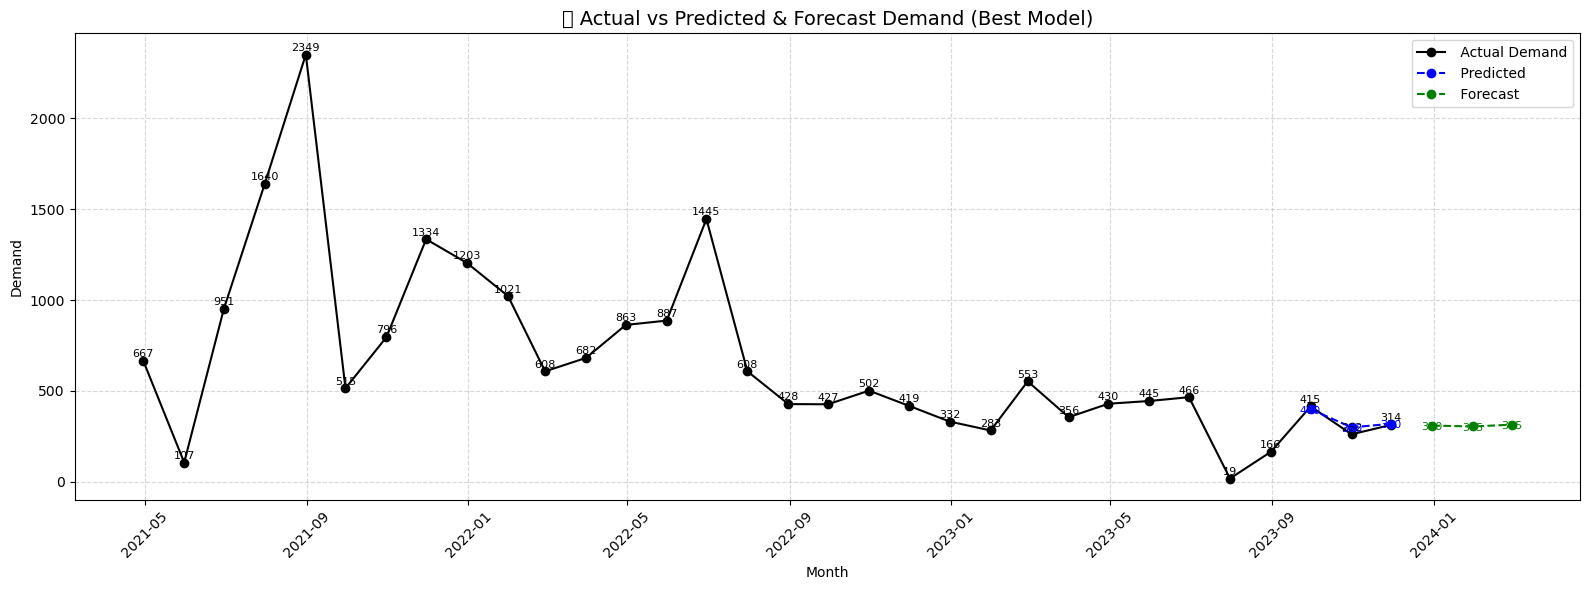

In [63]:
import matplotlib.pyplot as plt
import pandas as pd


# Predicted values (for last 3 months in actual set)
predicted_months = pd.to_datetime(['2023-09-30', '2023-10-31', '2023-11-30'])
predicted_demand = [356.46, 19.02, 283.07]

# Forecasted months and values
forecast_months = pd.to_datetime(['2023-12-31', '2024-01-31', '2024-02-29'])
forecast_demand = [19.02, 19.02, 19.02]

# Combine for full predicted line
predicted_line_months = list(predicted_months) + list(forecast_months)
predicted_line_values = predicted_demand + forecast_demand

# Plot
plt.figure(figsize=(16, 6))

# Plot actual
plt.plot(months, actual_demand, label=' Actual Demand', color='black', marker='o')
for x, y in zip(months, actual_demand):
    plt.text(x, y + 20, f'{int(y)}', ha='center', fontsize=8)

# Plot predicted (dashed)
# Plot predicted values
plt.plot(predicted_months, predicted_values, label=' Predicted', color='blue', linestyle='--', marker='o')
for x, y in zip(predicted_months, predicted_values):
    plt.text(x, y - 25, f'{int(y)}', ha='center', fontsize=8, color='blue')

# Plot forecasted values
plt.plot(forecast_months, forecast_values, label=' Forecast', color='green', linestyle='--', marker='o')
for x, y in zip(forecast_months, forecast_values):
    plt.text(x, y - 25, f'{int(y)}', ha='center', fontsize=8, color='green')


# Formatting
plt.title("📈 Actual vs Predicted & Forecast Demand (Best Model)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Demand")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
